In [1]:
# Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# references
# https://www.datacamp.com/community/tutorials/random-forests-classifier-python
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [2]:
# Load data
#data   = pd.read_csv('..\Data\data2.csv') # larger dataset, for train & test
#data_v = pd.read_csv('..\Data\data1.csv') # smaller dataset, for validation

# brain data regressed out demographic/clinical variables
data   = pd.read_csv('..\Data\data2_regressed.csv') # larger dataset, for train & test
data_v = pd.read_csv('..\Data\data1_regressed.csv') # smaller dataset, for validation

data.head(5)

,Scan_ID,Part,head_injury_yes,small_25_50_voxels,medium_50_75_voxels,large_75_100_voxels,Xlarge_100up_voxels
0,21636,2,1,-0.110172,-0.072359,0.145977,-0.018267
1,23723,2,0,0.204566,0.124844,0.032457,0.010932
2,23733,2,1,-0.150827,-0.014678,-0.061176,-0.056804
3,21552,2,1,-0.134841,-0.037175,-0.018770,-0.028511
4,22549,2,1,0.202032,0.072084,0.081361,0.123569


In [3]:
print('Data shape:', data.shape)
print('Data_v shape:', data_v.shape)

Data shape: (148, 7)
Data_v shape: (80, 7)


In [4]:
# Descriptive statistics per column
data.describe()

,Scan_ID,Part,head_injury_yes,small_25_50_voxels,medium_50_75_voxels,large_75_100_voxels,Xlarge_100up_voxels
count,1.480000e+02,148.0,148.000000,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02
mean,1.503030e+07,2.0,0.851351,-9.001808e-18,-2.055882e-17,2.037128e-17,3.094372e-17
std,1.825814e+08,0.0,0.356950,1.541050e-01,1.409271e-01,1.219372e-01,1.383954e-01
min,2.028000e+04,2.0,0.000000,-3.084357e-01,-2.546484e-01,-2.084114e-01,-2.236282e-01
25%,2.108200e+04,2.0,1.000000,-9.669684e-02,-8.811159e-02,-6.251904e-02,-6.911550e-02
50%,2.180400e+04,2.0,1.000000,-1.398837e-02,-2.848425e-02,-2.184739e-02,-2.233897e-02
75%,2.333475e+04,2.0,1.000000,6.482499e-02,5.991530e-02,3.486005e-02,3.100823e-02
max,2.221221e+09,2.0,1.000000,6.733560e-01,6.671788e-01,7.460102e-01,8.921467e-01


In [5]:
# One-hot encoding (NOT NECESSARY HERE)
data   = pd.get_dummies(data)
data_v = pd.get_dummies(data_v)
data.iloc[:,1:].head(5)

,Part,head_injury_yes,small_25_50_voxels,medium_50_75_voxels,large_75_100_voxels,Xlarge_100up_voxels
0,2,1,-0.110172,-0.072359,0.145977,-0.018267
1,2,0,0.204566,0.124844,0.032457,0.010932
2,2,1,-0.150827,-0.014678,-0.061176,-0.056804
3,2,1,-0.134841,-0.037175,-0.018770,-0.028511
4,2,1,0.202032,0.072084,0.081361,0.123569


In [6]:
# split data into Y and X

# keep labels
y   = np.array(  data['head_injury_yes'])
y_v = np.array(data_v['head_injury_yes'])

# remove labels & nuisance variables from data
X   = data.drop(  ['Scan_ID', 'Part', 'head_injury_yes'], axis=1) # axis=1 refers to columns
X_v = data_v.drop(['Scan_ID', 'Part', 'head_injury_yes'], axis=1) # axis=1 refers to columns

# save feature names
feature_list = list(X.columns)

# convert to numpy array
X   = np.array(X)
X_v = np.array(X_v)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [8]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)
print('Validation Features Shape:', X_v.shape)
print('Validation Labels Shape:', y_v.shape)

Training Features Shape: (111, 4)
Training Labels Shape: (111,)
Testing Features Shape: (37, 4)
Testing Labels Shape: (37,)
Validation Features Shape: (80, 4)
Validation Labels Shape: (80,)


In [9]:
#Create a random forest Classifier
clf = RandomForestClassifier(n_estimators=100) # n_estimators refers to the number of decision trees

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred = clf.predict(X_test)

# prediction on validation set
y_v_pred = clf.predict(X_v)

In [10]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy on testing data:",   metrics.accuracy_score(y_test, y_pred))
print("Accuracy on validation data:",metrics.accuracy_score(y_v, y_v_pred))

Accuracy on testing data: 0.7837837837837838
Accuracy on validation data: 0.85


In [11]:
clf.feature_importances_

array([0.27227433, 0.21161139, 0.2546285 , 0.26148578])

In [12]:
# Feature importance
feature_imp = pd.Series(clf.feature_importances_, index=feature_list).sort_values(ascending=False)
feature_imp

small_25_50_voxels     0.272274
Xlarge_100up_voxels    0.261486
large_75_100_voxels    0.254629
medium_50_75_voxels    0.211611
dtype: float64

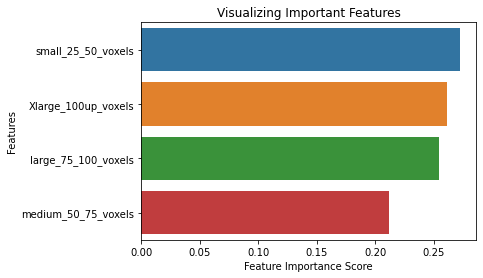

In [13]:
# Visulization of feature importance

%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [14]:
# 10-Fold Cross validation
print(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

0.8196969696969697


In [15]:
# Grid Search
param_grid = {
                 'n_estimators': [50, 100, 150, 200],
                 'max_depth': [2, 5, 8, 10]
             }

#
grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 8, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [16]:
# best model
grid_clf.best_estimator_

RandomForestClassifier(max_depth=2)

In [17]:
# best hyper-parameters
grid_clf. best_params_

{'max_depth': 2, 'n_estimators': 100}

In [18]:
# grid scores
grid_clf.cv_results_

{'mean_fit_time': array([0.05309541, 0.09686701, 0.14526491, 0.19499593, 0.05319519,
        0.10307302, 0.15236304, 0.20684621, 0.05188088, 0.10304329,
        0.15467346, 0.19949374, 0.05108092, 0.10779908, 0.15318351,
        0.19841757]),
 'std_fit_time': array([0.00529043, 0.0034866 , 0.00376582, 0.00747094, 0.00354484,
        0.00815885, 0.00634183, 0.01287592, 0.00390162, 0.00641308,
        0.00705335, 0.0044842 , 0.00389227, 0.00774912, 0.00914308,
        0.00815801]),
 'mean_score_time': array([0.00376818, 0.0062006 , 0.00994587, 0.01256676, 0.0037369 ,
        0.00692458, 0.01021411, 0.01345937, 0.00378683, 0.00652361,
        0.00989237, 0.01268818, 0.00373051, 0.00720241, 0.00995595,
        0.01255305]),
 'std_score_time': array([0.00052644, 0.00040973, 0.00052005, 0.00063239, 0.00050485,
        0.0007949 , 0.00090552, 0.00080683, 0.00039715, 0.00065141,
        0.00072315, 0.00056949, 0.00064581, 0.00076653, 0.00063201,
        0.00063485]),
 'param_max_depth': masked

In [19]:
score={"AUC":"roc_auc","ACC":make_score(accuracy)}

NameError: name 'make_score' is not defined